<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/Final-Project/MLProjectLogReg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Energy Consumption by Day of the Week:
  Day_of_week  Usage_kWh
4    Thursday  175279.52
5     Tuesday  171862.65
1      Monday  168636.34
0      Friday  165709.51
6   Wednesday  161013.14
2    Saturday   79467.75
3      Sunday   37667.80
Target classes: ['Light_Load' 'Maximum_Load' 'Medium_Load']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

  Light_Load       0.86      0.83      0.84      3625
Maximum_Load       0.53      0.48      0.50      1435
 Medium_Load       0.50      0.56      0.53      1948

    accuracy                           0.68      7008
   macro avg       0.63      0.62      0.62      7008
weighted avg       0.69      0.68      0.69      7008



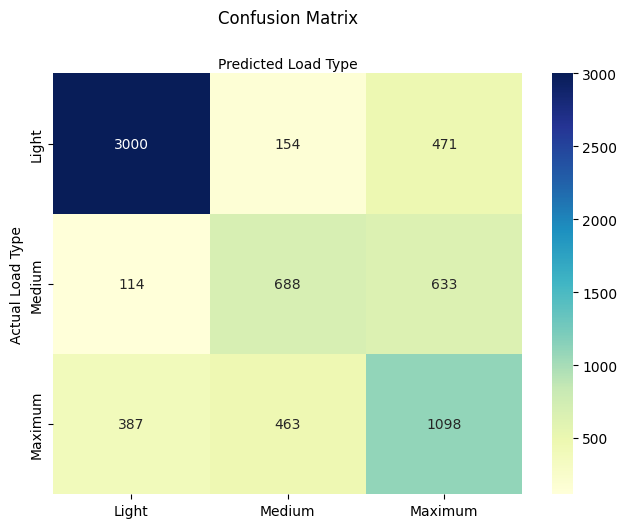

In [3]:

# Use of Logistic Regression to classify UC Irvine's
# "Steel Industry Energy Consumption" dataset into Light, Medium,
# and Maximum load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
steel_industry_energy_consumption = fetch_ucirepo(id=851)

y = steel_industry_energy_consumption.data.targets
X = steel_industry_energy_consumption.data.features

# Check for missing values and handle them
if X.isnull().sum().any():
    X = X.fillna(X.median())  # Replace missing values with median

# Analyze energy consumption by day of the week
if 'Day_of_week' in X.columns:
    energy_by_day = X.groupby('Day_of_week')['Usage_kWh'].sum().reset_index()
    energy_by_day = energy_by_day.sort_values(by='Usage_kWh', ascending=False)
    print("\nEnergy Consumption by Day of the Week:")
    print(energy_by_day)

# Encode categorical features if they exist
categorical_columns = ['WeekStatus', 'Day_of_week']
for col in categorical_columns:
    if col in X.columns:
        X = pd.get_dummies(X, columns=[col], drop_first=True)
# Identify and scale continuous features if they exist
continuous_columns = [
    'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
    'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'
]
existing_continuous_columns = [col for col in continuous_columns if col in X.columns]
scaler = StandardScaler()
X[existing_continuous_columns] = scaler.fit_transform(X[existing_continuous_columns])

# Ensure y is a Series if it's a single-column DataFrame
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]  # Extract the first column as a Series

# Encode target variable if categorical
if y.dtype == 'object' or isinstance(y.iloc[0], str):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    print("Target classes:", label_encoder.classes_)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)




model = LogisticRegression(penalty='l1', C=0.001, solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

cnf_matrix = confusion_matrix(Y_test, predicted)

report = classification_report(Y_test, predicted)
print(report)

class_names=['Light','Medium','Maximum'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Load Type')
plt.xlabel('Predicted Load Type')
plt.show()

In [ ]:


C = [10, 1, .1, .001]
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print('')



C: 10
Training accuracy: 0.7572060502283106
Test accuracy: 0.7552796803652968

C: 1
Training accuracy: 0.7574557648401826
Test accuracy: 0.7554223744292238

C: 0.1
Training accuracy: 0.7578481735159818
Test accuracy: 0.7558504566210046

C: 0.001
Training accuracy: 0.6989155251141552
Test accuracy: 0.69449200913242

